In [17]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns

In [18]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [19]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
print('The data have ', stroke.shape[0], ' rows and ', stroke.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(stroke.columns)))

The data have  5110  rows and  12  columns

column names: 

id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


#### Drop all null values within the bmi column, and save the result as stroke_new

In [23]:
#select columns of dtype 'object'
stroke.select_dtypes(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [24]:
stroke['gender'].value_counts().head()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [25]:
stroke['ever_married'].value_counts().head()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [26]:
stroke['work_type'].value_counts().head()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [27]:
stroke['Residence_type'].value_counts().head()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [28]:
stroke['smoking_status'].value_counts().head()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [29]:
stroke['stroke'].value_counts().head()

0    4861
1     249
Name: stroke, dtype: int64

In [30]:
# Replace 1 and 0 by 'Yes' and 'No'
stroke['stroke'] = stroke['stroke'].replace(1, 'Yes')
stroke['stroke'] = stroke['stroke'].replace(0, 'No')
stroke["stroke"].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
# Replace 1 and 0 by 'Yes' and 'No'
stroke['hypertension'] = stroke['hypertension'].replace(1, 'Yes')
stroke['hypertension'] = stroke['hypertension'].replace(0, 'No')
stroke["hypertension"].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
# Replace 1 and 0 by 'Yes' and 'No'
stroke['heart_disease'] = stroke['heart_disease'].replace(1, 'Yes')
stroke['heart_disease'] = stroke['heart_disease'].replace(0, 'No')
stroke["heart_disease"].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='stroke', ylabel='count'>

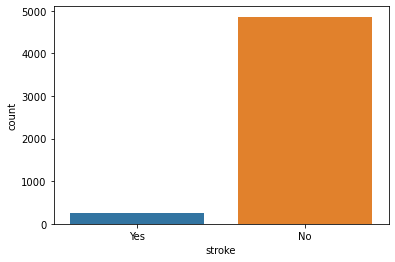

In [31]:
sns.countplot(x=stroke["stroke"])

<AxesSubplot:xlabel='stroke', ylabel='count'>

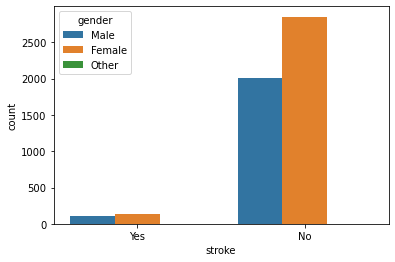

In [33]:
sns.countplot(data=stroke, x="stroke", hue="gender")

Women who have stroke are more than men who have stroke.

<AxesSubplot:xlabel='stroke', ylabel='count'>

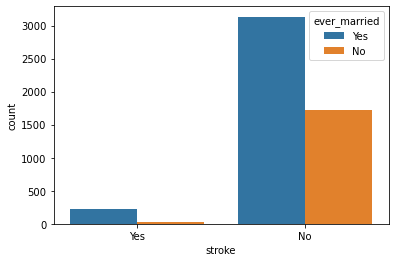

In [38]:
sns.countplot(data=stroke, x="stroke",hue="ever_married")

The number of patients who are married than the number of patients who are not married when they have stroke.

<AxesSubplot:xlabel='stroke', ylabel='count'>

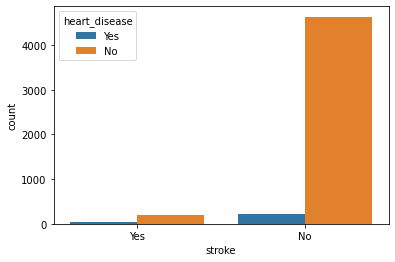

In [46]:
sns.countplot(data=stroke, x="stroke",hue="heart_disease")

Very few people who do not have stroke but have heart disease.

<AxesSubplot:xlabel='stroke', ylabel='count'>

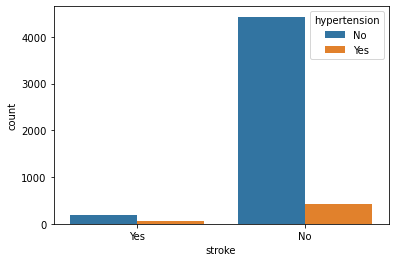

In [47]:
sns.countplot(data=stroke, x="stroke",hue="hypertension")

Very few people who do not have stroke but have hypertension.

<AxesSubplot:xlabel='work_type', ylabel='count'>

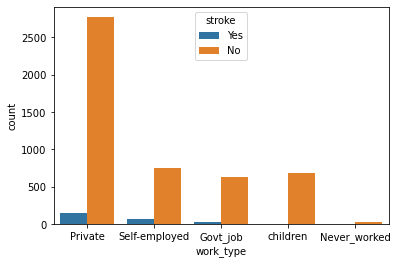

In [49]:
sns.countplot(data=stroke, x="work_type",hue="stroke")

People whose working status is private has the most number of stroke.

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

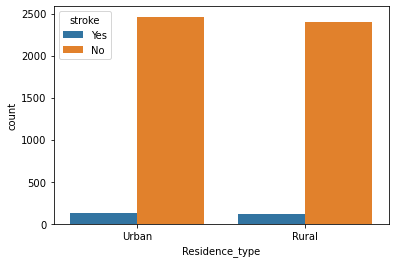

In [50]:
sns.countplot(data=stroke, x="Residence_type",hue="stroke")

Urban and rural area has very close number of strokes, which means the Residence_type may not affect stroke very significantly.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

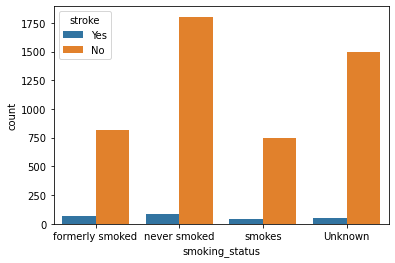

In [51]:
sns.countplot(data=stroke, x="smoking_status",hue="stroke")

The number of strokes in every somke category seems very close, it's very hard to say the somking has relation with stroke.